In [5]:
#importazione del dataset
import pandas as pd
import numpy as np

boston = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data", 
                     sep="\s+",
                     usecols=[5,13],
                     names=["RM", "MEDV"])
boston.head()

<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
/var/folders/wb/kbfflkgd24l9kfh0dvs2fsj40000gn/T/ipykernel_47566/1330472335.py:6: SyntaxWarning: invalid escape sequence '\s'
  sep="\s+",


,RM,MEDV
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2


In [10]:
X = boston.drop("MEDV", axis=1).values      #array numpy per proprietà
Y = boston["MEDV"].values                   #array numpy per target
X.size

506

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.3)

Costruisco la regressione lineare con scikitlearn

In [13]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, Y_train)                            #alleno il modello sui dati di train
Y_pred = lr.predict(X_test)                         #faccio la predizione sul test

Valuto il modello con la funzione di costo (MSE)

In [14]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, Y_pred)              #valuto quanto la predizione si discosta dal valore calcolato

41.23370295165676

Valuto il modello con il coefficiente di standardizzazione per avere una misura oggettiva

In [17]:
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)                #tanto più vicino ad 1 quanto più preciso è il modello

0.5212102218813572

Visualizzo il modello con bias e peso

In [18]:
import matplotlib.pyplot as plt
print("Peso di RM: " +str(lr.coef_[0]))     #coefficiente angolare della retta di regressione
print("Bias: " +str(lr.intercept_))         #intercetta della retta di regressione

Peso di RM: 8.923202991220535
Bias: -33.78851767276599


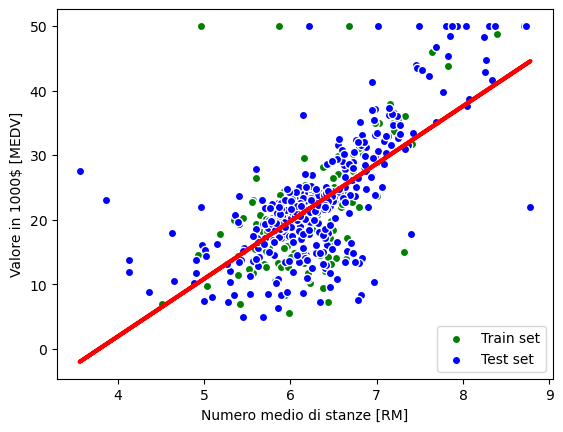

In [22]:
plt.scatter(X_train, Y_train, c="green", edgecolors="white", label="Train set")
plt.scatter(X_test, Y_test, c="blue", edgecolors="white", label="Test set")

plt.xlabel("Numero medio di stanze [RM]")
plt.ylabel("Valore in 1000$ [MEDV]")

plt.legend(loc="lower right")

plt.plot(X_test, Y_pred, color="red", linewidth=3)